In [6]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard 
import time 

# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(X_train, y_train, epochs=10, batch_size=64)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 250, 32)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total para

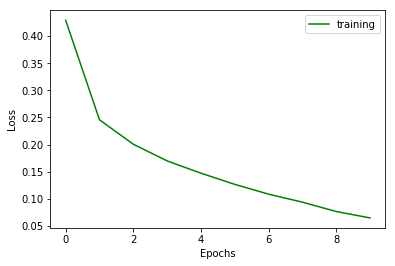

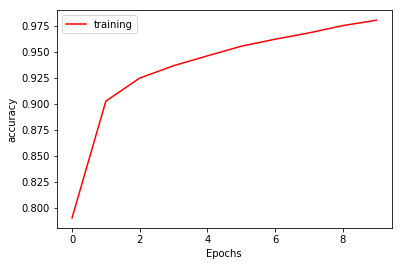

In [7]:
from keras.models import load_model
model.save('imdb.h5')
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.plot(history.history['loss'], 'g')
plt.legend(['training'])
    
plt.figure()
plt.xlabel('Epochs')
plt.ylabel("accuracy")
plt.plot(history.history['acc'], 'r')
plt.legend(['training'])
plt.show()
    




In [8]:
new_model= load_model('imdb.h5')
# Final evaluation of the model
print("Evaluation on Testing data")
print(model.evaluate(X_test, y_test, verbose=0))

Evaluation on Testing data
[0.4254577413892746, 0.86332]
